In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv("./data/2022/heart_2022_with_nans.csv")

df_dropped = data.dropna()
print("After dropping na",len(df_dropped))
df_no_duplicates = df_dropped.drop_duplicates()
print("After dropping duplicates",len(df_no_duplicates))

After dropping na 246022
After dropping duplicates 246013


In [4]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns 
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df_no_outliers = remove_outliers(df_no_duplicates)

In [5]:
def encode_categorical(df):
    categorical_columns = df.select_dtypes(include=['object']).columns 
    encoding_map = {}

    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
        encoding_map[col] = dict(enumerate(uniques)) 

    return df, encoding_map
df_encoded, category_mapping = encode_categorical(df_no_outliers)

In [6]:
print("\nCategory Mappings:")
for col, mapping in category_mapping.items():
    print(f"{col}: {mapping}")
print(len(df_encoded))


Category Mappings:
State: {0: 'Alabama', 1: 'Alaska', 2: 'Arizona', 3: 'Arkansas', 4: 'California', 5: 'Colorado', 6: 'Connecticut', 7: 'Delaware', 8: 'District of Columbia', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho', 13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana', 19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi', 25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey', 31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma', 37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota', 42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington', 48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming', 51: 'Guam', 52: 'Puerto Rico', 53: 'Virgin Islands'}
Sex: {0: 'Female', 1: 'Male'}
GeneralHealth: {0: 'Very good', 1: 'Fair', 2: 'Go

0 State {0: 'Alabama', 1: 'Alaska', 2: 'Arizona', 3: 'Arkansas', 4: 'California', 5: 'Colorado', 6: 'Connecticut', 7: 'Delaware', 8: 'District of Columbia', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho', 13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana', 19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi', 25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey', 31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma', 37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota', 42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington', 48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming', 51: 'Guam', 52: 'Puerto Rico', 53: 'Virgin Islands'}
1 Sex {0: 'Female', 1: 'Male'}
2 GeneralHealth {0: 'Very good', 1: 'Fair', 2: 'Good', 3: 'Excellen

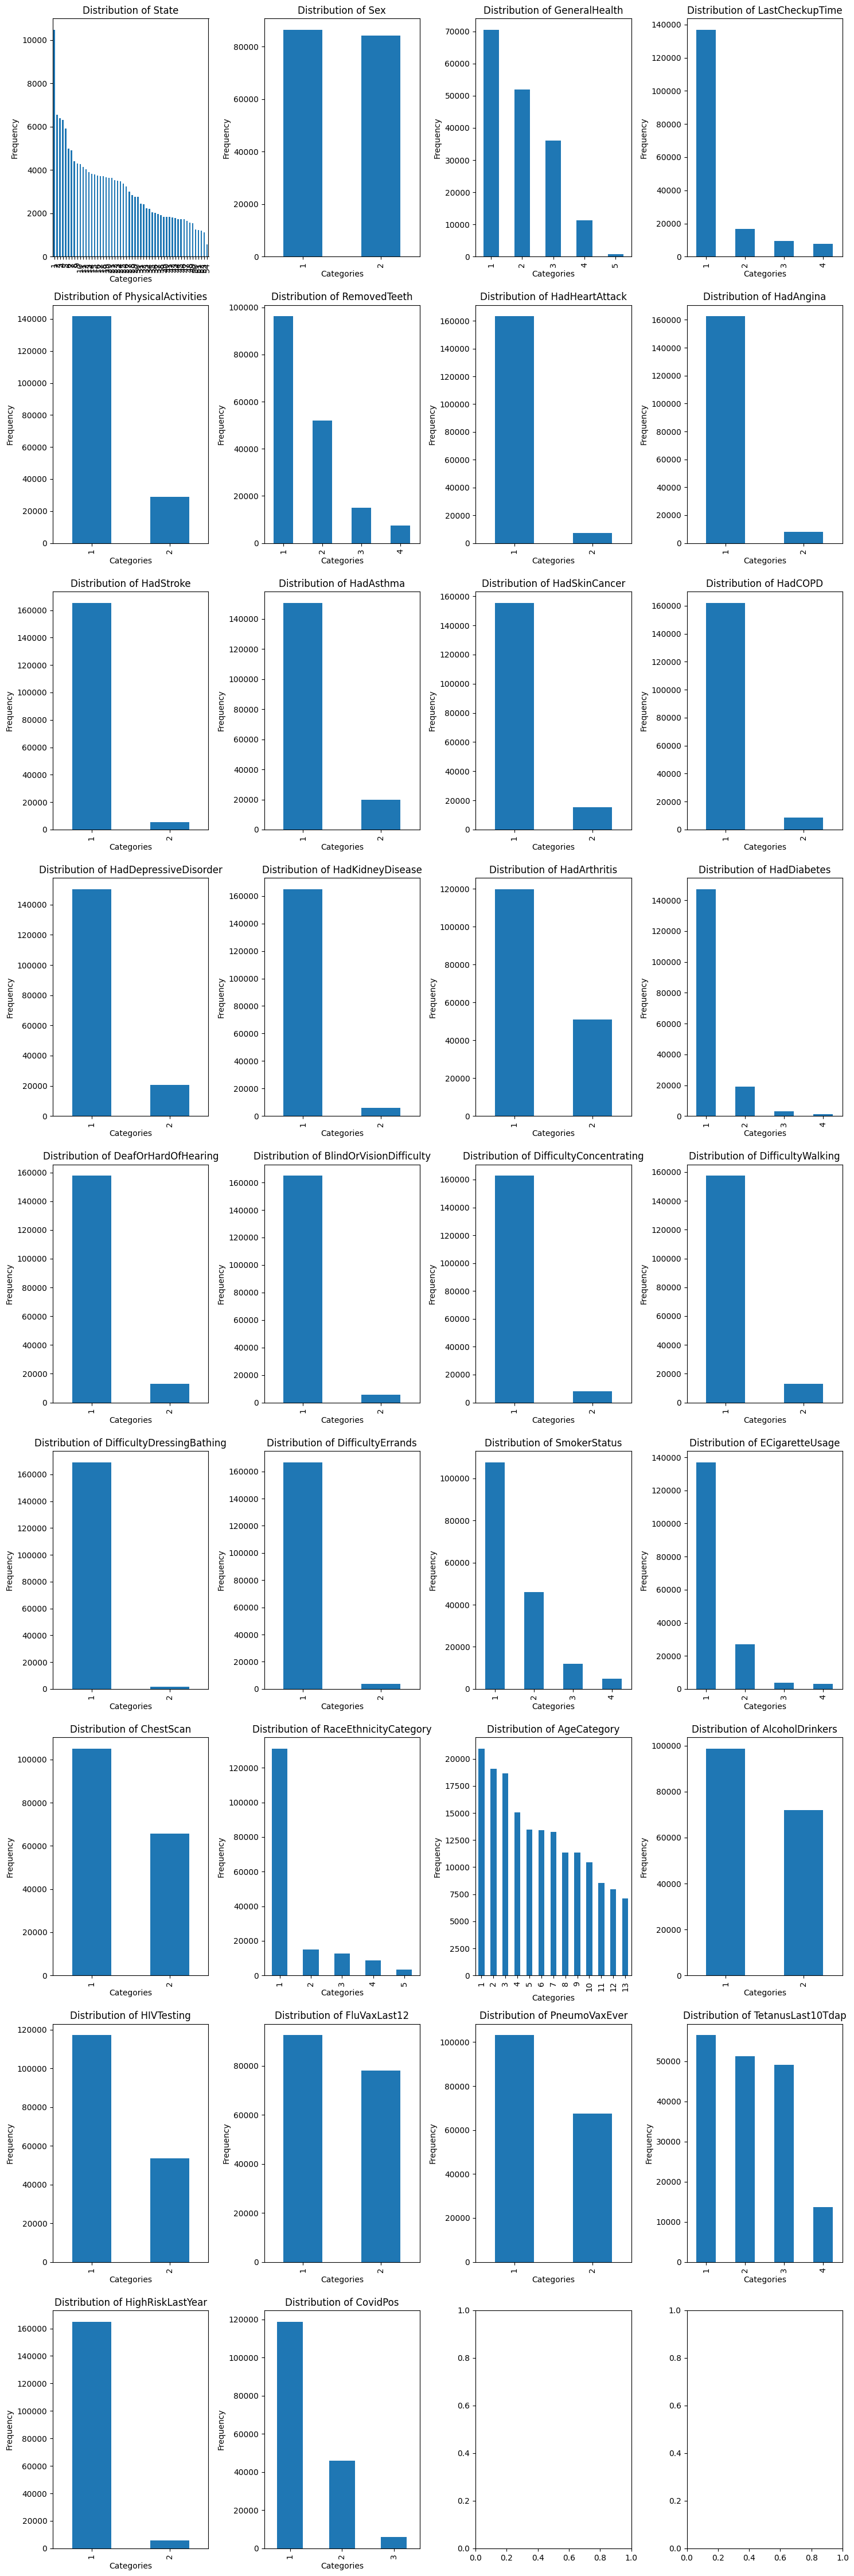

In [7]:
#Plotting
def get_optimal_grid(n_cols, max_cols=4):
    n_rows = math.ceil(n_cols / max_cols)
    return n_rows, min(n_cols, max_cols)

def plot_categorical_distributions(df, category_mapping, ax, max_cols):
    for i, (col, mapping) in enumerate(category_mapping.items()):
        print(i, col, mapping)
        row = i // max_cols
        col_idx = i % max_cols
        df[col].value_counts().plot(kind='bar', ax=ax[row, col_idx])
        ax[row, col_idx].set_title(f'Distribution of {col}')
        ax[row, col_idx].set_xlabel('Categories')
        ax[row, col_idx].set_ylabel('Frequency')
        ax[row, col_idx].set_xticks(range(len(mapping)))
        ax[row, col_idx].set_xticklabels(range(1, len(mapping) + 1), rotation=90)

n_cols = len(category_mapping)
n_rows, max_cols = get_optimal_grid(n_cols, max_cols=4)
fig, ax = plt.subplots(n_rows, max_cols, figsize=(15, n_rows * 5))
ax = ax.flatten() if n_rows == 1 else ax
plot_categorical_distributions(df_encoded, category_mapping, ax, max_cols)
for i in range(n_cols, len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
# plt.savefig("./heart.png")
plt.show()